In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Задача 1
`Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):`  
`zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]`  
`ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]`  
`Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.`

In [ ]:
ZP = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
KS = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

n = len(ZP)
m_ZP = np.mean(ZP)
m_KS = np.mean(KS)

__Расчёт по формуле__

In [28]:
b1 = (n * np.sum(ZP * KS) - np.sum(ZP) * np.sum(KS)) / (n * np.sum(ZP**2) - np.sum(ZP)**2)
b0 = m_KS - m_ZP * b1

b1, b0

(2.6205388824027653, 444.17735732435955)

__Альтернативный расчёт для b1__

In [17]:
np.cov(ZP, KS, ddof=1)[0][1] / np.var(ZP, ddof=1)

2.6205388824027653

Как видно, 2 варианта расчёта b1 дают идентичный результат, но при условии равенства ddof для ковариации и дисперсии.

__Расчёт с исп. матричных вычислений с интерсептом__

In [19]:
matrix_ZP = np.hstack((np.ones((n, 1)), np.matrix(ZP.reshape(n, 1))))
matrix_KS = np.matrix(KS.reshape(n, 1))

matrix_B = (matrix_ZP.T @ matrix_ZP).I @ matrix_ZP.T @ matrix_KS
print(f"b1: {float(matrix_B[1][0])}, b0: {float(matrix_B[0][0])}")

b1: 2.620538882402765, b0: 444.1773573243596


__Расчёт с исп. матричных вычислений без интерсепта__

In [22]:
matrix_ZP = np.matrix(ZP.reshape(n, 1))
matrix_KS = np.matrix(KS.reshape(n, 1))

matrix_B_ = (matrix_ZP.T @ matrix_ZP).I @ matrix_ZP.T @ matrix_KS
print(f"b: {float(matrix_B_[0][0])}")

b: 5.889820420132689


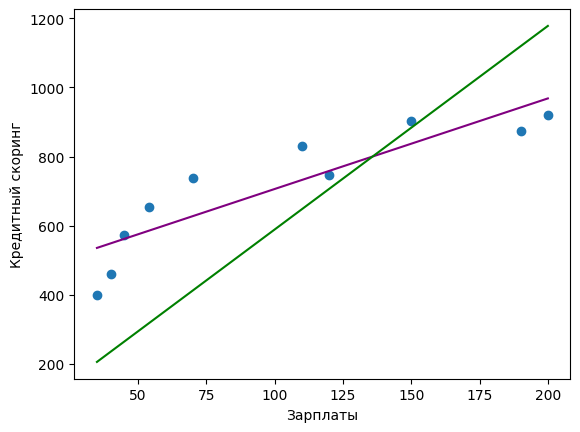

In [23]:
b1 = float(matrix_B[1][0])
b0 = float(matrix_B[0][0])
b = float(matrix_B_[0][0])

plt.scatter(ZP, KS)
plt.plot(np.sort(ZP), b0 + b1 * np.sort(ZP), color='purple')
plt.plot(np.sort(ZP), b * np.sort(ZP), color='green')
plt.xlabel("Зарплаты")
plt.ylabel("Кредитный скоринг")
plt.show()

__Расчёт с помощью библиотечных функций__

In [24]:
from sklearn.linear_model import LinearRegression

x = ZP.reshape(-1, 1)

model = LinearRegression()
model.fit(x, KS)
r2 = model.score(x, KS)

model.coef_[0], model.intercept_, r2

(2.6205388824027667, 444.17735732435943, 0.7876386635293686)

In [25]:
import statsmodels.api as sm

x = sm.add_constant(ZP)
model = sm.OLS(KS, x)

print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     29.67
Date:                Fri, 10 Mar 2023   Prob (F-statistic):           0.000611
Time:                        13:46:18   Log-Likelihood:                -58.064
No. Observations:                  10   AIC:                             120.1
Df Residuals:                       8   BIC:                             120.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        444.1774     56.466      7.866      0.0

C:\Program Files\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### Задача 2
`Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).`

In [13]:
ALPHA = 1e-5
ITER_NUM = 120
STEP = 10

b = 2

for i in range(ITER_NUM):
    dMSE = (2 / n) * np.sum((b * ZP - KS) * ZP)
    b -= ALPHA * dMSE
    if not i % STEP:
        print(f"{i}\tdMSE: {dMSE}\tb: {b}")

0	dMSE: -107177.0	b: 3.07177
10	dMSE: -4268.680689521369	b: 5.777582184219032
20	dMSE: -170.01441381166296	b: 5.885350158880083
30	dMSE: -6.771389805429499	b: 5.889642377102131
40	dMSE: -0.2696931328879146	b: 5.889813328976504
50	dMSE: -0.010741426512686303	b: 5.889820137703795
60	dMSE: -0.0004278130567399785	b: 5.8898204088840185
70	dMSE: -1.7039083468262108e-05	b: 5.889820419684673
80	dMSE: -6.786343874409795e-07	b: 5.889820420114845
90	dMSE: -2.704691723920405e-08	b: 5.889820420131978
100	dMSE: -1.0746589396148921e-09	b: 5.8898204201326605
110	dMSE: -5.3114490583539014e-11	b: 5.889820420132688


### Задача 3
`Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).`

In [14]:
ITER_NUM = 300
STEP = 30

b1 = 2
b0 = 5

for i in range(ITER_NUM):
    dMSE = (2 / n) * np.sum((b1 * ZP - KS + b0) * ZP)
    b1 -= ALPHA * dMSE
    b0 = m_KS - m_ZP * b1
    if not i % STEP:
        print(f"{i}\tdMSE: {dMSE}\tb1: {b1}\tb0: {b0}")

0	dMSE: -106163.0	b1: 3.06163	b0: 399.45071799999994
30	dMSE: 377.0664860477427	b1: 2.670717477844886	b0: 439.0892477465285
60	dMSE: 42.89514321039678	b1: 2.626247207372581	b0: 443.5985331724202
90	dMSE: 4.879758289651363	b1: 2.621188262355989	b0: 444.1115101971027
120	dMSE: 0.5551220763769379	b1: 2.6206127559691588	b0: 444.16986654472726
150	dMSE: 0.06315077537983597	b1: 2.6205472862713868	b0: 444.17650517208136
180	dMSE: 0.007184042216613307	b1: 2.6205398384281926	b0: 444.1772603833812
210	dMSE: 0.0008172577887307853	b1: 2.620538991160371	b0: 444.1773462963383
240	dMSE: 9.297138458350674e-05	b1: 2.6205388947750494	b0: 444.17735606980995
270	dMSE: 1.0576448039500975e-05	b1: 2.62053888381024	b0: 444.17735718164164


Сходимость вычислений без интерсепта существенно быстрее.